In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
import json

# Charger les données JSON
with open('3943077.json') as f:
    data = json.load(f)

# Convertir les données JSON en DataFrame
df = pd.json_normalize(data)

# Afficher les 5 premières lignes pour vérifier le contenu
df.head()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 2037: character maps to <undefined>

In [10]:
# Vérifier les équipes uniques présentes dans les données
equipes = df['team.name'].unique()

# Vérifier si deux équipes distinctes existent
if len(equipes) == 2:
    equipe_1, equipe_2 = equipes
    print(f"Les deux équipes qui s'affrontent sont : {equipe_1} et {equipe_2}")
else:
    print("Les données ne contiennent pas exactement deux équipes distinctes.")

Les deux équipes qui s'affrontent sont : Argentina et Colombia


In [2]:
# Extraire les noms des joueurs et leurs postes pour chaque équipe
joueurs_et_postes_par_equipe = df.groupby('team.name').apply(
    lambda x: x[['player.name', 'position.name']].dropna().drop_duplicates()
)

# Afficher les joueurs avec leurs postes pour chaque équipe
for equipe, data in joueurs_et_postes_par_equipe.groupby(level=0):
    print(f"Équipe : {equipe}")
    print("Joueurs et postes :")
    for _, row in data.iterrows():
        print(f" - {row['player.name']} : {row['position.name']}")
    print("\n")

Équipe : Argentina
Joueurs et postes :
 - Lionel Andrés Messi Cuccittini : Right Center Forward
 - Enzo Fernandez : Left Defensive Midfield
 - Rodrigo Javier De Paul : Right Defensive Midfield
 - Cristian Gabriel Romero : Right Center Back
 - Nicolás Alejandro Tagliafico : Left Back
 - Lisandro Martínez : Left Center Back
 - Damián Emiliano Martínez : Goalkeeper
 - Gonzalo Ariel Montiel : Right Back
 - Julián Álvarez : Left Center Forward
 - Ángel Fabián Di María Hernández : Right Midfield
 - Alexis Mac Allister : Left Midfield
 - Alexis Mac Allister : Left Defensive Midfield
 - Enzo Fernandez : Right Defensive Midfield
 - Rodrigo Javier De Paul : Right Midfield
 - Ángel Fabián Di María Hernández : Left Midfield
 - Nicolás Iván González : Right Center Forward
 - Julián Álvarez : Center Forward
 - Rodrigo Javier De Paul : Right Center Midfield
 - Nicolás Iván González : Left Midfield
 - Enzo Fernandez : Center Defensive Midfield
 - Alexis Mac Allister : Left Center Midfield
 - Nahuel Mo

<ipython-input-2-396204f04f6f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  joueurs_et_postes_par_equipe = df.groupby('team.name').apply(


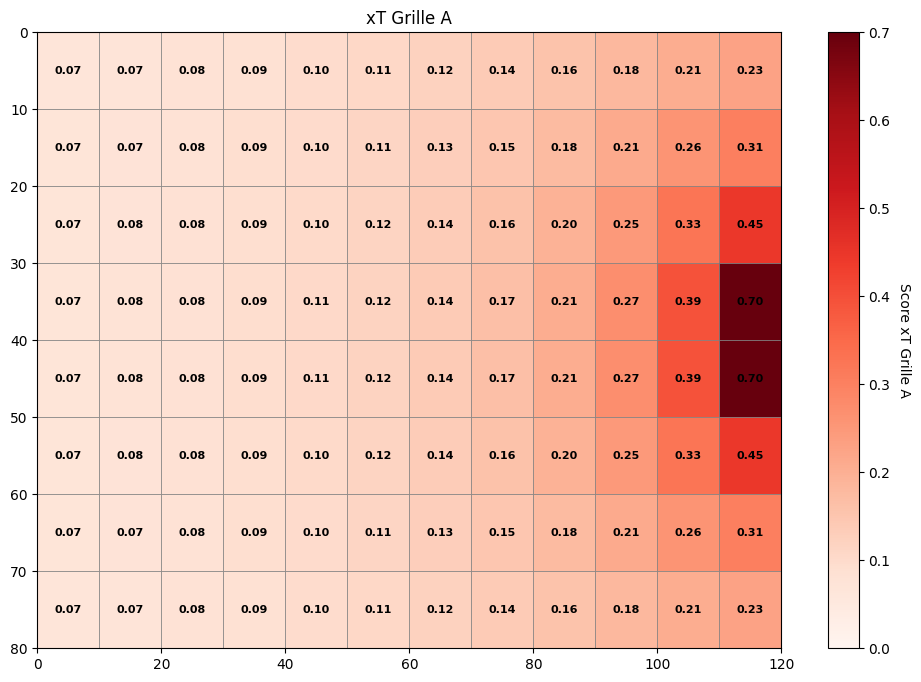

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import numpy as np

# Paramètres pour le terrain et la grille
terrain_longueur = 120  # Longueur du terrain (en yards)
terrain_largeur = 80    # Largeur du terrain (en yards)
grille_xT_longueur = 12  # Nombre de cellules en longueur
grille_xT_largeur = 8    # Nombre de cellules en largeur

# Gardien adverse pour xT_grilleA
gardien_x = terrain_longueur
gardien_y = terrain_largeur / 2

# Initialisation de la grille xT_grilleA
xT_grilleA = np.zeros((grille_xT_largeur, grille_xT_longueur))
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = (i + 0.5) * (terrain_largeur / grille_xT_largeur)
        distance_au_centre = np.sqrt((gardien_x - cell_x) ** 2 + (gardien_y - cell_y) ** 2)
        xT_grilleA[i, j] = 1 / (1 + distance_au_centre)

# Normalisation pour que le score maximal soit 0.7
max_xT = xT_grilleA[int(grille_xT_largeur / 2), grille_xT_longueur - 1]
xT_grilleA = (xT_grilleA / max_xT) * 0.7

# Visualisation de xT_grilleA
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, terrain_longueur)
ax.set_ylim(0, terrain_largeur)
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=0, vmax=0.7)

for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = i * (terrain_largeur / grille_xT_largeur)
        ax.add_patch(Rectangle((cell_x, cell_y), terrain_longueur / grille_xT_longueur, terrain_largeur / grille_xT_largeur,
                               color=cmap(norm(xT_grilleA[i, j])), ec='grey', lw=0.5))
        ax.text(cell_x + terrain_longueur / grille_xT_longueur / 2, cell_y + terrain_largeur / grille_xT_largeur / 2,
                f"{xT_grilleA[i, j]:.2f}", color="black", ha="center", va="center", fontsize=8, weight='bold')

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Score xT Grille A', rotation=270, labelpad=15)
plt.gca().invert_yaxis()
plt.title('xT Grille A')
plt.show()

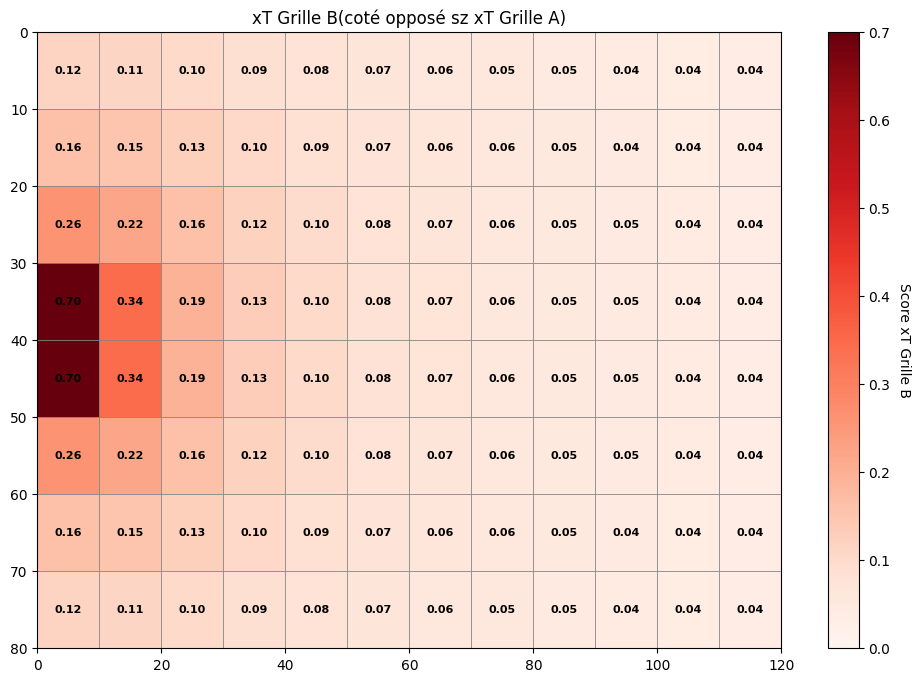

In [4]:
# Gardien opposé pour xT_grilleB
gardien_x = 0
gardien_y = terrain_largeur / 2

# Initialisation de la grille xT_grilleB
xT_grilleB = np.zeros((grille_xT_largeur, grille_xT_longueur))
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = (i + 0.5) * (terrain_largeur / grille_xT_largeur)
        distance_au_centre = np.sqrt((gardien_x - cell_x) ** 2 + (gardien_y - cell_y) ** 2)
        xT_grilleB[i, j] = 1 / (1 + distance_au_centre)

# Normalisation pour que le score maximal soit 0.7
max_xT = xT_grilleB[int(grille_xT_largeur / 2), 0]
xT_grilleB = (xT_grilleB / max_xT) * 0.7

# Visualisation de xT_grilleB
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, terrain_longueur)
ax.set_ylim(0, terrain_largeur)
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=0, vmax=0.7)

for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = i * (terrain_largeur / grille_xT_largeur)
        ax.add_patch(Rectangle((cell_x, cell_y), terrain_longueur / grille_xT_longueur, terrain_largeur / grille_xT_largeur,
                               color=cmap(norm(xT_grilleB[i, j])), ec='grey', lw=0.5))
        ax.text(cell_x + terrain_longueur / grille_xT_longueur / 2, cell_y + terrain_largeur / grille_xT_largeur / 2,
                f"{xT_grilleB[i, j]:.2f}", color="black", ha="center", va="center", fontsize=8, weight='bold')

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Score xT Grille B', rotation=270, labelpad=15)
plt.gca().invert_yaxis()
plt.title('xT Grille B(coté opposé sz xT Grille A)')
plt.show()

In [7]:
def calculer_temps_total_match(df):
    """
    Calcule le temps total d'un match en additionnant les durées de chaque période.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données du match,
                           avec les colonnes 'period', 'minute', et 'second'.

    Returns:
        float: Temps total du match en secondes.
    """
    # Grouper par période
    periodes = df.groupby('period')

    temps_total = 0

    for period, events in periodes:
        # Trouver le premier et le dernier événement de la période
        debut = events.iloc[0]
        fin = events.iloc[-1]

        # Calculer la durée de la période en secondes
        temps_periode = (fin['minute'] * 60 + fin['second']) - (debut['minute'] * 60 + debut['second'])
        temps_total += temps_periode

    return temps_total

# Exemple d'utilisation
temps_total_match = calculer_temps_total_match(df)
print(f"Le temps total du match est de {temps_total_match // 60} minutes et {temps_total_match % 60} secondes.")


Le temps total du match est de 130 minutes et 31 secondes.


In [8]:
def convertir_temps(seconds):
    """
    Convertir un temps donné en secondes en format minutes:secondes.

    Args:
        seconds (int): Temps en secondes.

    Returns:
        str: Temps formaté en "minutes:secondes".
    """
    minutes = seconds // 60
    secondes = seconds % 60
    return f"{minutes} min {secondes} sec"

def obtenir_mitemps_details(df):
    """
    Obtenir les détails des mi-temps : nombre, temps de début et de fin (formaté en minutes:secondes),
    trié par ordre croissant du temps de début.

    Args:
        df (pd.DataFrame): DataFrame contenant les données du match, avec les colonnes 'period', 'minute', et 'second'.

    Returns:
        pd.DataFrame: DataFrame avec les détails de chaque mi-temps (période, début, fin, durée).
    """
    # Grouper les événements par période
    periodes = df.groupby('period')

    mitemps_details = []

    for period, events in periodes:
        # Trouver le temps de début (premier événement) et de fin (dernier événement) pour chaque période
        debut = events.iloc[0]
        fin = events.iloc[-1]

        # Calcul du temps en secondes
        temps_debut_sec = debut['minute'] * 60 + debut['second']
        temps_fin_sec = fin['minute'] * 60 + fin['second']
        duree_sec = temps_fin_sec - temps_debut_sec

        # Ajouter les temps formatés
        mitemps_details.append({
            'period': period,
            'start_time': convertir_temps(temps_debut_sec),  # Temps formaté
            'end_time': convertir_temps(temps_fin_sec),      # Temps formaté
            'duration': convertir_temps(duree_sec)           # Durée formatée
        })

    # Convertir les détails en DataFrame
    mitemps_df = pd.DataFrame(mitemps_details)

    # Trier par le temps de départ (start_time en secondes)
    mitemps_df = mitemps_df.sort_values(by='period').reset_index(drop=True)

    return mitemps_df

# Exemple d'utilisation
mitemps_details_df = obtenir_mitemps_details(df)

# Afficher les résultats
print("Nombre de mi-temps :", len(mitemps_details_df))
print("Détails des mi-temps :")
print(mitemps_details_df)



Nombre de mi-temps : 4
Détails des mi-temps :
   period     start_time        end_time       duration
0       1    0 min 0 sec    46 min 4 sec   46 min 4 sec
1       2   45 min 0 sec    94 min 0 sec   49 min 0 sec
2       3   90 min 0 sec  105 min 59 sec  15 min 59 sec
3       4  105 min 0 sec  124 min 28 sec  19 min 28 sec


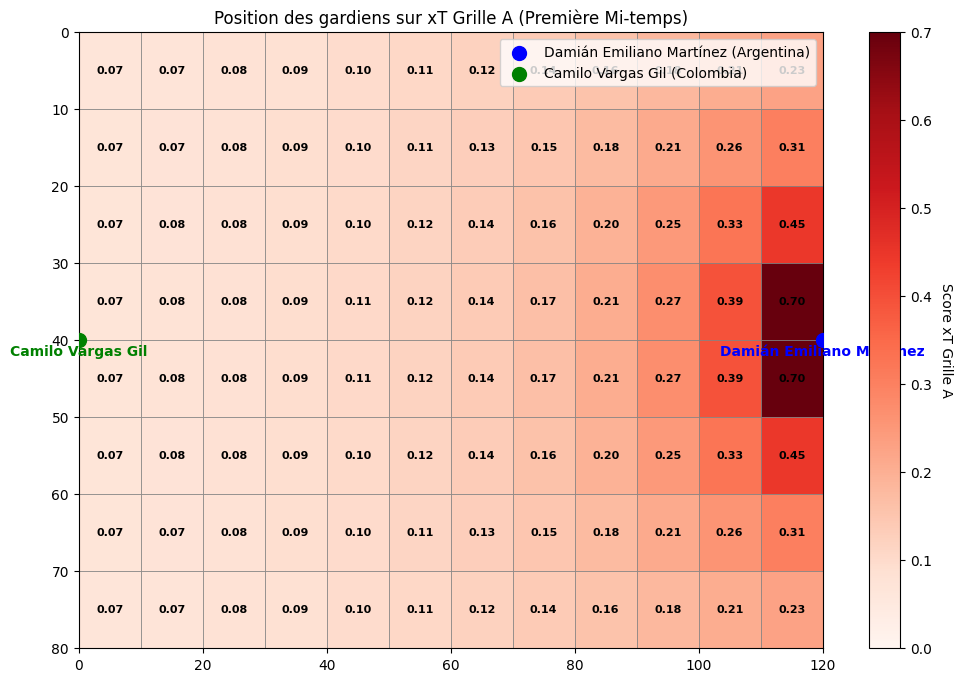

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import numpy as np

# Paramètres pour le terrain et la grille
terrain_longueur = 120  # Longueur du terrain (en yards)
terrain_largeur = 80    # Largeur du terrain (en yards)
grille_xT_longueur = 12  # Nombre de cellules en longueur
grille_xT_largeur = 8    # Nombre de cellules en largeur

# Gardien adverse pour xT_grilleA
gardien_x_Argentina = terrain_longueur  # Position x du gardien argentin
gardien_y_Argentina = terrain_largeur / 2  # Position y du gardien argentin

gardien_x_Colombia = 0  # Position x du gardien colombien
gardien_y_Colombia = terrain_largeur / 2  # Position y du gardien colombien

# Initialisation de la grille xT_grilleA
xT_grilleA = np.zeros((grille_xT_largeur, grille_xT_longueur))
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = (i + 0.5) * (terrain_largeur / grille_xT_largeur)
        distance_au_centre = np.sqrt((gardien_x_Argentina - cell_x) ** 2 + (gardien_y_Argentina - cell_y) ** 2)
        xT_grilleA[i, j] = 1 / (1 + distance_au_centre)

# Normalisation pour que le score maximal soit 0.7
max_xT = xT_grilleA[int(grille_xT_largeur / 2), grille_xT_longueur - 1]
xT_grilleA = (xT_grilleA / max_xT) * 0.7

# Visualisation de xT_grilleA
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, terrain_longueur)
ax.set_ylim(0, terrain_largeur)
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=0, vmax=0.7)

# Tracer la grille
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = i * (terrain_largeur / grille_xT_largeur)
        ax.add_patch(Rectangle((cell_x, cell_y), terrain_longueur / grille_xT_longueur, terrain_largeur / grille_xT_largeur,
                               color=cmap(norm(xT_grilleA[i, j])), ec='grey', lw=0.5))
        ax.text(cell_x + terrain_longueur / grille_xT_longueur / 2, cell_y + terrain_largeur / grille_xT_largeur / 2,
                f"{xT_grilleA[i, j]:.2f}", color="black", ha="center", va="center", fontsize=8, weight='bold')

# Tracer la position des gardiens
ax.scatter(gardien_x_Argentina, gardien_y_Argentina, color='blue', label='Damián Emiliano Martínez (Argentina)', s=100, zorder=5)
ax.scatter(gardien_x_Colombia, gardien_y_Colombia, color='green', label='Camilo Vargas Gil (Colombia)', s=100, zorder=5)

# Ajouter le texte pour les gardiens
ax.text(gardien_x_Argentina, gardien_y_Argentina + 2, 'Damián Emiliano Martínez', color='blue', ha='center', fontsize=10, weight='bold')
ax.text(gardien_x_Colombia, gardien_y_Colombia + 2, 'Camilo Vargas Gil', color='green', ha='center', fontsize=10, weight='bold')

# Légende et colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Score xT Grille A', rotation=270, labelpad=15)
plt.gca().invert_yaxis()
plt.title('Position des gardiens sur xT Grille A (Première Mi-temps)')
plt.legend(loc='upper right')

plt.show()


In [10]:
# Filtrer les événements pour l'équipe de l'Argentine
argentina_df = df[df['team.name'] == 'Argentina']

# Fonction pour obtenir le score xT d'une position sur la grille
def get_xt_value(location, grid, x_bins, y_bins):
    x, y = location
    x_bin = min(int(x / terrain_longueur * x_bins), x_bins - 1)
    y_bin = min(int(y / terrain_largeur * y_bins), y_bins - 1)
    return grid[y_bin, x_bin]

# Fonction pour calculer le score xT_passes et ajouter les valeurs au DataFrame
def calculate_xt_pass(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_pass_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            # Calcul des scores xT pour la position de départ et d'arrivée
            xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
            xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

            # Calcul de la différence (score xT de la passe)
            xT_pass = xT_end - xT_start

            # Normalisation du score à 0.7
            xT_pass = min(xT_pass, 0.7)  # Limiter le score à 0.7

            xT_pass_values.append((row['player.name'], xT_pass, start_loc, end_loc))

    # Convertir les résultats en DataFrame
    xT_passes_df = pd.DataFrame(xT_pass_values, columns=['player.name', 'xT_passes', 'start_location', 'end_location'])
    return xT_passes_df

# Calcul du xT des passes pour l'Argentine sur la grille A
xT_passes_argentina_df = calculate_xt_pass(argentina_df, xT_grilleA)

# Affichage des 10 meilleures passes de l'Argentine par score xT
top_passes_argentina = xT_passes_argentina_df.nlargest(10, 'xT_passes')

# Afficher les résultats
print(top_passes_argentina)



                         player.name  xT_passes start_location   end_location
258                   Julián Álvarez   0.518967   [99.5, 76.5]  [111.3, 44.9]
43               Alexis Mac Allister   0.504981   [81.6, 28.9]  [112.4, 36.1]
85    Lionel Andrés Messi Cuccittini   0.493610   [82.4, 31.4]  [114.4, 33.6]
17    Lionel Andrés Messi Cuccittini   0.472029   [120.0, 0.1]  [116.4, 32.2]
327   Lionel Andrés Messi Cuccittini   0.472029  [120.0, 80.0]  [116.6, 47.9]
401  Ángel Fabián Di María Hernández   0.472029  [120.0, 80.0]  [118.2, 30.5]
479  Ángel Fabián Di María Hernández   0.441751  [103.7, 64.8]  [118.6, 31.5]
434          Cristian Gabriel Romero   0.372068  [109.1, 51.4]  [111.1, 42.0]
514  Ángel Fabián Di María Hernández   0.372068  [100.5, 59.0]  [120.0, 33.9]
470           Leandro Daniel Paredes   0.281727   [71.7, 31.3]  [112.3, 53.0]


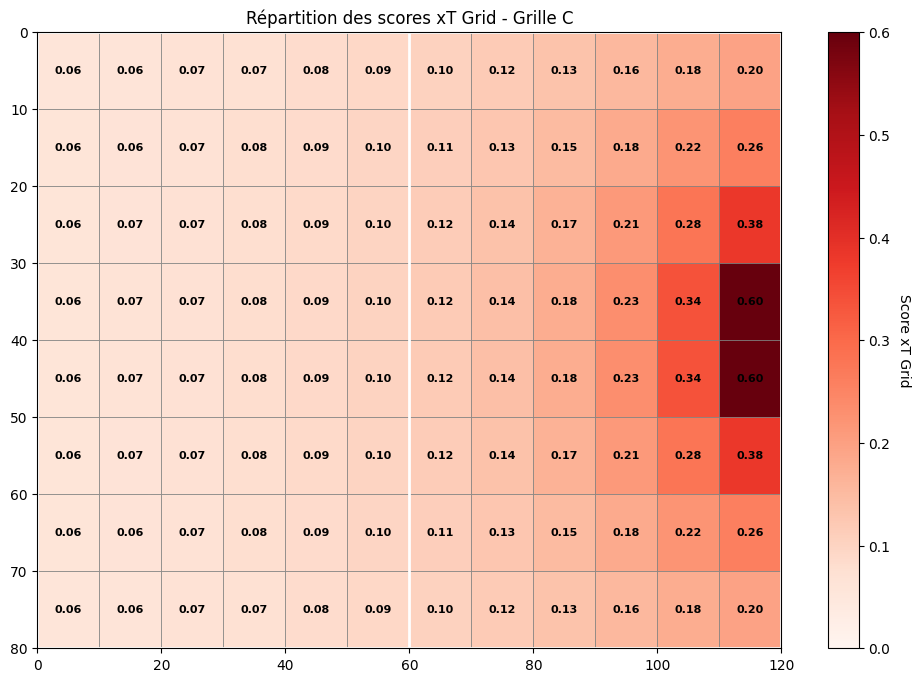

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Paramètres pour le terrain
terrain_longueur = 120  # en yards
terrain_largeur = 80    # en yards
grille_xT_longueur = 12  # Nombre de cellules en longueur
grille_xT_largeur = 8    # Nombre de cellules en largeur

# Position centrale virtuelle pour le gardien
gardien_x = terrain_longueur
gardien_y = terrain_largeur / 2

# Initialisation de la grille xT
xT_Grid_C = np.zeros((grille_xT_largeur, grille_xT_longueur))  # Grille C
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = (i + 0.5) * (terrain_largeur / grille_xT_largeur)
        distance_au_centre = np.sqrt((gardien_x - cell_x) ** 2 + (gardien_y - cell_y) ** 2)
        xT_Grid_C[i, j] = 1 / (1 + distance_au_centre)

# Normalisation pour que le score maximal soit 0.6
max_value = np.max(xT_Grid_C)
xT_Grid_C /= max_value  # Normalisation des valeurs entre 0 et 1
xT_Grid_C *= 0.6  # Modifier le score maximal à 0.6

# Visualisation de la grille xT C
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#A9DFBF')
ax.set_xlim(0, terrain_longueur)
ax.set_ylim(0, terrain_largeur)

# Tracer les lignes de but et les bordures du terrain
ax.plot([0, 0], [0, terrain_largeur], 'white', lw=2)
ax.plot([terrain_longueur, terrain_longueur], [0, terrain_largeur], 'white', lw=2)
ax.plot([0, terrain_longueur], [0, 0], 'white', lw=2)
ax.plot([0, terrain_longueur], [terrain_largeur, terrain_largeur], 'white', lw=2)

# Surfaces de réparation et rond central
surface_largeur = 44
surface_profondeur = 18
ax.add_patch(Rectangle((0, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
ax.add_patch(Rectangle((terrain_longueur - surface_profondeur, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
ax.add_patch(plt.Circle((terrain_longueur / 2, terrain_largeur / 2), 10, color='white', fill=False, lw=2))
ax.plot([terrain_longueur / 2, terrain_longueur / 2], [0, terrain_largeur], 'white', lw=2)

# Tracer les scores xT Grid avec une colormap
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=0, vmax=0.6)

# Afficher la grille de scores xT et les valeurs sur le terrain
for i in range(grille_xT_largeur):
    for j in range(grille_xT_longueur):
        cell_x = j * (terrain_longueur / grille_xT_longueur)
        cell_y = i * (terrain_largeur / grille_xT_largeur)
        ax.add_patch(Rectangle((cell_x, cell_y), terrain_longueur / grille_xT_longueur, terrain_largeur / grille_xT_largeur,
                               color=cmap(norm(xT_Grid_C[i, j])), ec='grey', lw=0.5))

        # Ajouter les annotations pour les scores de xT_Grid sur le terrain
        ax.text(cell_x + terrain_longueur / grille_xT_longueur / 2, cell_y + terrain_largeur / grille_xT_largeur / 2,
                f"{xT_Grid_C[i, j]:.2f}", color="black", ha="center", va="center", fontsize=8, weight='bold')

# Ajouter une barre de couleur pour les scores
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Score xT Grid', rotation=270, labelpad=15)

# Afficher le titre et inverser l'axe Y pour correspondre à la disposition d'un terrain de football
plt.title('Répartition des scores xT Grid - Grille C')
plt.gca().invert_yaxis()

# Afficher la visualisation
plt.show()


In [12]:
# Filtrer les événements pour l'équipe de l'Argentine
argentina_df = df[df['team.name'] == 'Argentina']

# Fonction pour obtenir le score xT d'une position sur la grille
def get_xt_value(location, grid, x_bins, y_bins):
    x, y = location
    x_bin = min(int(x / terrain_longueur * x_bins), x_bins - 1)
    y_bin = min(int(y / terrain_largeur * y_bins), y_bins - 1)
    return grid[y_bin, x_bin]

# Fonction pour calculer le score xT_passes et ajouter les valeurs au DataFrame
def calculate_xt_pass(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_pass_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            # Calcul des scores xT pour la position de départ et d'arrivée
            xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
            xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

            # Calcul de la différence (score xT de la passe)
            xT_pass = xT_end - xT_start

            xT_pass_values.append((row['player.name'], xT_pass, start_loc, end_loc))

    # Convertir les résultats en DataFrame
    xT_passes_df = pd.DataFrame(xT_pass_values, columns=['player.name', 'xT_passes', 'start_location', 'end_location'])
    return xT_passes_df

# Calcul du xT des passes pour l'Argentine sur la grille C
xT_passes_argentina_df_C = calculate_xt_pass(argentina_df, xT_Grid_C)

# Affichage des 10 meilleures passes de l'Argentine par score xT sur la grille C
top_passes_argentina_C = xT_passes_argentina_df_C.nlargest(10, 'xT_passes')

# Afficher les résultats
print(top_passes_argentina_C)


                         player.name  xT_passes start_location   end_location
258                   Julián Álvarez   0.444829   [99.5, 76.5]  [111.3, 44.9]
43               Alexis Mac Allister   0.432841   [81.6, 28.9]  [112.4, 36.1]
85    Lionel Andrés Messi Cuccittini   0.423094   [82.4, 31.4]  [114.4, 33.6]
17    Lionel Andrés Messi Cuccittini   0.404596   [120.0, 0.1]  [116.4, 32.2]
327   Lionel Andrés Messi Cuccittini   0.404596  [120.0, 80.0]  [116.6, 47.9]
401  Ángel Fabián Di María Hernández   0.404596  [120.0, 80.0]  [118.2, 30.5]
479  Ángel Fabián Di María Hernández   0.378644  [103.7, 64.8]  [118.6, 31.5]
434          Cristian Gabriel Romero   0.318915  [109.1, 51.4]  [111.1, 42.0]
514  Ángel Fabián Di María Hernández   0.318915  [100.5, 59.0]  [120.0, 33.9]
470           Leandro Daniel Paredes   0.241480   [71.7, 31.3]  [112.3, 53.0]


In [13]:
# Affichage des 5 passes les plus faibles de l'Argentine par score xT sur la grille C
lowest_5_passes_argentina_C = xT_passes_argentina_df_C.nsmallest(5, 'xT_passes')

# Afficher les résultats
print(lowest_5_passes_argentina_C)


              player.name  xT_passes start_location  end_location
314   Alexis Mac Allister  -0.151438  [110.0, 22.3]  [99.2, 42.1]
315        Enzo Fernandez  -0.126519  [101.4, 43.0]  [99.2, 50.1]
190        Julián Álvarez  -0.105457  [101.2, 38.7]  [99.8, 31.4]
319        Enzo Fernandez  -0.083145   [91.8, 51.4]  [70.7, 63.0]
430  Nahuel Molina Lucero  -0.059094  [106.9, 80.0]  [75.1, 72.1]


In [14]:
# Filtrer les événements pour l'équipe de la Colombie
colombia_df = df[df['team.name'] == 'Colombia']

# Calcul du xT des passes pour la Colombie sur la grille C
xT_passes_colombia_df_C = calculate_xt_pass(colombia_df, xT_Grid_C)

# Affichage des 10 meilleures passes de la Colombie par score xT
top_passes_colombia_C = xT_passes_colombia_df_C.nlargest(10, 'xT_passes')

# Afficher les résultats
print(top_passes_colombia_C)


                         player.name  xT_passes start_location   end_location
157            Davinson Sánchez Mina   0.489270   [64.8, 60.7]  [114.3, 37.3]
104      James David Rodríguez Rubio   0.432841   [84.3, 51.6]  [111.6, 34.8]
230      James David Rodríguez Rubio   0.404596   [120.0, 0.1]  [112.5, 42.5]
335      James David Rodríguez Rubio   0.404596  [120.0, 80.0]  [115.8, 31.9]
361      James David Rodríguez Rubio   0.404596  [120.0, 80.0]  [116.3, 41.0]
549  Juan Fernando Quintero Paniagua   0.404596  [120.0, 80.0]  [117.7, 40.6]
589  Juan Fernando Quintero Paniagua   0.404596   [120.0, 0.1]  [112.0, 33.0]
96            Santiago Arias Naranjo   0.338299  [114.5, 65.8]  [114.5, 45.6]
197             Richard Rios Montoya   0.338299  [114.5, 67.3]  [113.5, 46.3]
98      Jefferson Andrés Lerma Solís   0.318915  [109.6, 29.7]  [113.4, 38.7]


In [15]:
# Extraire les noms des joueurs et leurs postes pour chaque équipe
joueurs_et_postes_par_equipe = df.groupby('team.name').apply(
    lambda x: x[['player.name', 'position.name']].dropna().drop_duplicates()
)

# Créer un dictionnaire des postes des joueurs par équipe
postes_par_joueur = joueurs_et_postes_par_equipe.set_index('player.name')['position.name'].to_dict()

# Filtrer les événements pour l'équipe de l'Argentine
argentina_df = df[df['team.name'] == 'Argentina']

# Fonction pour obtenir le score xT d'une position sur la grille
def get_xt_value(location, grid, x_bins, y_bins):
    x, y = location
    x_bin = min(int(x / terrain_longueur * x_bins), x_bins - 1)
    y_bin = min(int(y / terrain_largeur * y_bins), y_bins - 1)
    return grid[y_bin, x_bin]

# Fonction pour calculer le score xT_passes et ajouter les valeurs au DataFrame
def calculate_xt_pass(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_pass_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            # Calcul des scores xT pour la position de départ et d'arrivée
            xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
            xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

            # Calcul de la différence (score xT de la passe)
            xT_pass = xT_end - xT_start

            # Récupérer le poste du joueur depuis le dictionnaire
            player_name = row['player.name']
            player_position = postes_par_joueur.get(player_name, 'Unknown')

            xT_pass_values.append((player_name, player_position, xT_pass, start_loc, end_loc))

    # Convertir les résultats en DataFrame
    xT_passes_df = pd.DataFrame(xT_pass_values, columns=['player.name', 'player.position', 'xT_passes', 'start_location', 'end_location'])
    return xT_passes_df

# Calcul du xT des passes pour l'Argentine
xT_passes_argentina_df_C = calculate_xt_pass(argentina_df, xT_Grid_C)

# Calcul du score cumulé xT passe pour chaque joueur de l'Argentine, en ajoutant le poste
xT_cumulated_argentina = xT_passes_argentina_df_C.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()

# Afficher les scores cumulés xT des passes de l'Argentine
print("Score cumulé xT passe de chaque joueur de l'Argentine :")
print(xT_cumulated_argentina)

# Filtrer les événements pour l'équipe de la Colombie
colombia_df = df[df['team.name'] == 'Colombia']

# Calculer les xT passes pour la Colombie sur la grille C
xT_passes_colombia_df_C = calculate_xt_pass(colombia_df, xT_Grid_C)

# Calcul du score cumulé xT passe pour chaque joueur de la Colombie, en ajoutant le poste
xT_cumulated_colombia = xT_passes_colombia_df_C.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()

# Afficher les scores cumulés xT des passes de la Colombie
print("\nScore cumulé xT passe de chaque joueur de la Colombie :")
print(xT_cumulated_colombia)


<ipython-input-15-f0ac6651e7d6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  joueurs_et_postes_par_equipe = df.groupby('team.name').apply(


Score cumulé xT passe de chaque joueur de l'Argentine :
                        player.name            player.position  xT_passes
0               Alexis Mac Allister       Left Center Midfield   0.652471
1           Cristian Gabriel Romero          Right Center Back   0.692372
2          Damián Emiliano Martínez                 Goalkeeper   1.789016
3                    Enzo Fernandez  Center Defensive Midfield   0.288498
4                  Giovani Lo Celso    Left Defensive Midfield   0.094182
5             Gonzalo Ariel Montiel                 Right Back   0.385542
6                    Julián Álvarez             Center Forward   0.446562
7           Lautaro Javier Martínez             Center Forward   0.234584
8            Leandro Daniel Paredes   Right Defensive Midfield   0.444053
9    Lionel Andrés Messi Cuccittini       Right Center Forward   1.903378
10                Lisandro Martínez           Left Center Back   0.118155
11             Nahuel Molina Lucero            Right Win

In [17]:
# Fonction pour calculer les scores xT positifs et négatifs et les ajouter au DataFrame
def calculate_xt_pos_neg(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_pass_values_pos = []
    xT_pass_values_neg = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            # Calcul des scores xT pour la position de départ et d'arrivée
            xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
            xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

            # Calcul de la différence (score xT de la passe)
            xT_pass = xT_end - xT_start

            # Récupérer le poste du joueur depuis le dictionnaire
            player_name = row['player.name']
            player_position = postes_par_joueur.get(player_name, 'Unknown')

            # Séparer les passes en fonction du score xT
            if xT_pass > 0:
                xT_pass_values_pos.append((player_name, player_position, xT_pass, start_loc, end_loc))
            else:
                xT_pass_values_neg.append((player_name, player_position, xT_pass, start_loc, end_loc))

    # Convertir les résultats en DataFrame pour les passes positives et négatives
    xT_passes_pos_df = pd.DataFrame(xT_pass_values_pos, columns=['player.name', 'player.position', 'xT_passes', 'start_location', 'end_location'])
    xT_passes_neg_df = pd.DataFrame(xT_pass_values_neg, columns=['player.name', 'player.position', 'xT_passes', 'start_location', 'end_location'])

    return xT_passes_pos_df, xT_passes_neg_df

# Calcul des passes positives et négatives pour l'Argentine
xT_passes_pos_argentina, xT_passes_neg_argentina = calculate_xt_pos_neg(argentina_df, xT_Grid_C)

# Calcul des scores cumulés xT positifs et négatifs pour chaque joueur de l'Argentine
xT_cumulated_pos_argentina = xT_passes_pos_argentina.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()
xT_cumulated_neg_argentina = xT_passes_neg_argentina.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()

# Afficher les scores cumulés positifs et négatifs des passes de l'Argentine
print("Score cumulé positif xT passe de chaque joueur de l'Argentine :")
print(xT_cumulated_pos_argentina)

print("\nScore cumulé négatif xT passe de chaque joueur de l'Argentine :")
print(xT_cumulated_neg_argentina)

# Filtrer les événements pour l'équipe de la Colombie
colombia_df = df[df['team.name'] == 'Colombia']

# Calcul des passes positives et négatives pour la Colombie
xT_passes_pos_colombia, xT_passes_neg_colombia = calculate_xt_pos_neg(colombia_df, xT_Grid_C)

# Calcul des scores cumulés xT positifs et négatifs pour chaque joueur de la Colombie
xT_cumulated_pos_colombia = xT_passes_pos_colombia.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()
xT_cumulated_neg_colombia = xT_passes_neg_colombia.groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()

# Afficher les scores cumulés positifs et négatifs des passes de la Colombie
print("\nScore cumulé positif xT passe de chaque joueur de la Colombie :")
print(xT_cumulated_pos_colombia)

print("\nScore cumulé négatif xT passe de chaque joueur de la Colombie :")
print(xT_cumulated_neg_colombia)


Score cumulé positif xT passe de chaque joueur de l'Argentine :
                        player.name            player.position  xT_passes
0               Alexis Mac Allister       Left Center Midfield   0.987680
1           Cristian Gabriel Romero          Right Center Back   0.770494
2          Damián Emiliano Martínez                 Goalkeeper   1.793276
3                    Enzo Fernandez  Center Defensive Midfield   0.747777
4                  Giovani Lo Celso    Left Defensive Midfield   0.124374
5             Gonzalo Ariel Montiel                 Right Back   0.455159
6                    Julián Álvarez             Center Forward   0.664328
7           Lautaro Javier Martínez             Center Forward   0.294134
8            Leandro Daniel Paredes   Right Defensive Midfield   0.456693
9    Lionel Andrés Messi Cuccittini       Right Center Forward   2.058526
10                Lisandro Martínez           Left Center Back   0.185214
11             Nahuel Molina Lucero            R

In [18]:
# Filtrer les événements pour l'équipe de l'Argentine
argentina_df = df[df['team.name'] == 'Argentina']

# Fonction pour obtenir le score xT d'une position sur la grille
def get_xt_value(location, grid, x_bins, y_bins):
    x, y = location
    x_bin = min(int(x / terrain_longueur * x_bins), x_bins - 1)
    y_bin = min(int(y / terrain_largeur * y_bins), y_bins - 1)
    return grid[y_bin, x_bin]

# Fonction pour calculer le score xT_dribbles et ajouter les valeurs au DataFrame
def calculate_xt_dribble(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_dribble_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Carry':  # Vérifier que l'action est un dribble
            start_loc = row['location']
            end_loc = row['carry.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT du dribble)
                xT_dribble = xT_end - xT_start

                # Limiter xT à une valeur maximale de 0.6
                xT_dribble = min(xT_dribble, 0.6)

                xT_dribble_values.append((row['player.name'], xT_dribble, start_loc, end_loc))

    # Convertir les résultats en DataFrame
    xT_dribbles_df = pd.DataFrame(xT_dribble_values, columns=['player.name', 'xT_dribbles', 'start_location', 'end_location'])
    return xT_dribbles_df

# Calcul du xT des dribbles pour l'Argentine
xT_dribbles_argentina_df_C = calculate_xt_dribble(argentina_df, xT_Grid_C)

# Affichage des 10 meilleurs dribbles de l'Argentine par score xT
top_dribbles_argentina = xT_dribbles_argentina_df_C.nlargest(10, 'xT_dribbles')

# Afficher les résultats
print("Top 10 des dribbles pour l'Argentine :")
print(top_dribbles_argentina)

# --- Calcul des scores cumulés des dribbles pour l'Argentine ---

# Calcul des scores cumulés xT positifs et négatifs pour chaque joueur
xT_dribbles_pos_argentina = xT_dribbles_argentina_df_C[xT_dribbles_argentina_df_C['xT_dribbles'] > 0]
xT_dribbles_neg_argentina = xT_dribbles_argentina_df_C[xT_dribbles_argentina_df_C['xT_dribbles'] <= 0]

# Cumul des scores xT positifs et négatifs pour chaque joueur
xT_cumulated_pos_argentina = xT_dribbles_pos_argentina.groupby(['player.name'])['xT_dribbles'].sum().reset_index()
xT_cumulated_neg_argentina = xT_dribbles_neg_argentina.groupby(['player.name'])['xT_dribbles'].sum().reset_index()

print("\nScores cumulés positifs xT_dribble pour chaque joueur de l'Argentine :")
print(xT_cumulated_pos_argentina)

print("\nScores cumulés négatifs xT_dribble pour chaque joueur de l'Argentine :")
print(xT_cumulated_neg_argentina)

# ----------------------------

# Filtrer les événements pour l'équipe de la Colombie
colombia_df = df[df['team.name'] == 'Colombia']

# Calcul du xT des dribbles pour la Colombie
xT_dribbles_colombia_df_C = calculate_xt_dribble(colombia_df, xT_Grid_C)

# Affichage des 10 meilleurs dribbles de la Colombie par score xT
top_dribbles_colombia = xT_dribbles_colombia_df_C.nlargest(10, 'xT_dribbles')

# Afficher les résultats
print("\nTop 10 des dribbles pour la Colombie :")
print(top_dribbles_colombia)

# --- Calcul des scores cumulés des dribbles pour la Colombie ---

# Calcul des scores cumulés xT positifs et négatifs pour chaque joueur
xT_dribbles_pos_colombia = xT_dribbles_colombia_df_C[xT_dribbles_colombia_df_C['xT_dribbles'] > 0]
xT_dribbles_neg_colombia = xT_dribbles_colombia_df_C[xT_dribbles_colombia_df_C['xT_dribbles'] <= 0]

# Cumul des scores xT positifs et négatifs pour chaque joueur
xT_cumulated_pos_colombia = xT_dribbles_pos_colombia.groupby(['player.name'])['xT_dribbles'].sum().reset_index()
xT_cumulated_neg_colombia = xT_dribbles_neg_colombia.groupby(['player.name'])['xT_dribbles'].sum().reset_index()

print("\nScores cumulés positifs xT_dribble pour chaque joueur de la Colombie :")
print(xT_cumulated_pos_colombia)

print("\nScores cumulés négatifs xT_dribble pour chaque joueur de la Colombie :")
print(xT_cumulated_neg_colombia)


Top 10 des dribbles pour l'Argentine :
                         player.name  xT_dribbles start_location  \
296            Nicolás Iván González     0.228910    [94.0, 3.9]   
157   Lionel Andrés Messi Cuccittini     0.151438   [99.8, 31.4]   
260  Ángel Fabián Di María Hernández     0.146124    [86.9, 3.9]   
400  Ángel Fabián Di María Hernández     0.146124   [81.4, 78.9]   
410          Lautaro Javier Martínez     0.126519   [94.0, 20.8]   
12      Nicolás Alejandro Tagliafico     0.122381  [111.8, 13.7]   
252                   Enzo Fernandez     0.105457   [99.2, 42.1]   
381  Ángel Fabián Di María Hernández     0.105457   [91.3, 44.6]   
269            Nicolás Iván González     0.103544    [74.8, 1.7]   
204     Nicolás Alejandro Tagliafico     0.090269    [55.7, 7.6]   

      end_location  
296  [110.8, 25.3]  
157  [119.5, 23.7]  
260  [107.5, 24.9]  
400  [100.5, 59.0]  
410  [108.7, 34.2]  
12   [115.0, 25.5]  
252  [101.4, 43.0]  
381  [100.2, 44.8]  
269  [109.8, 17.1]  
20

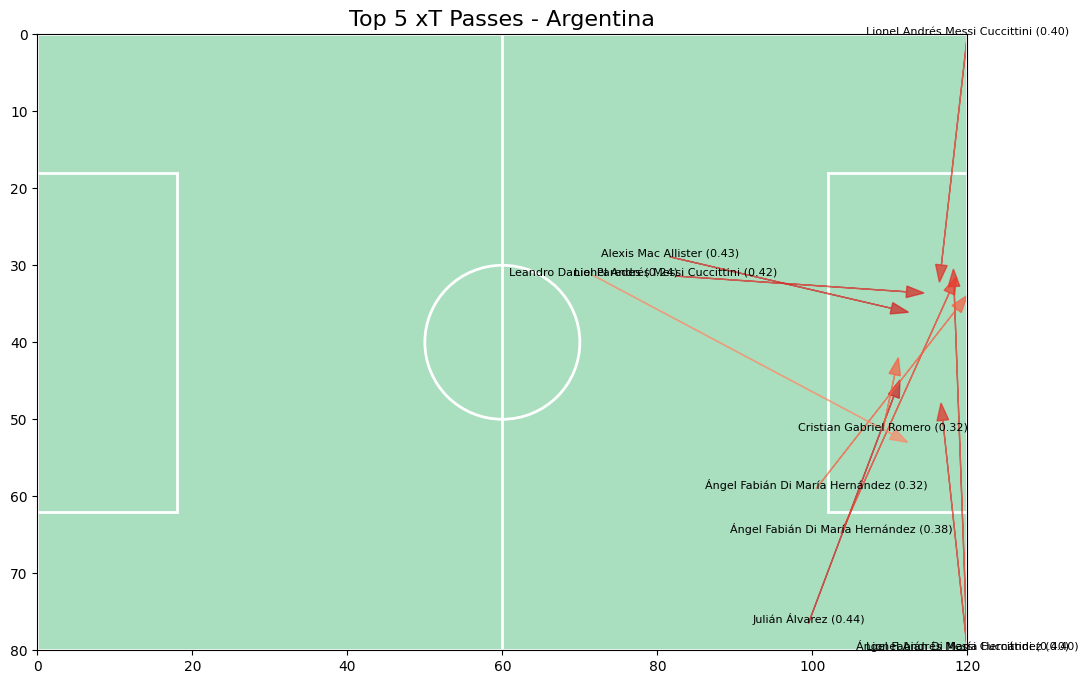

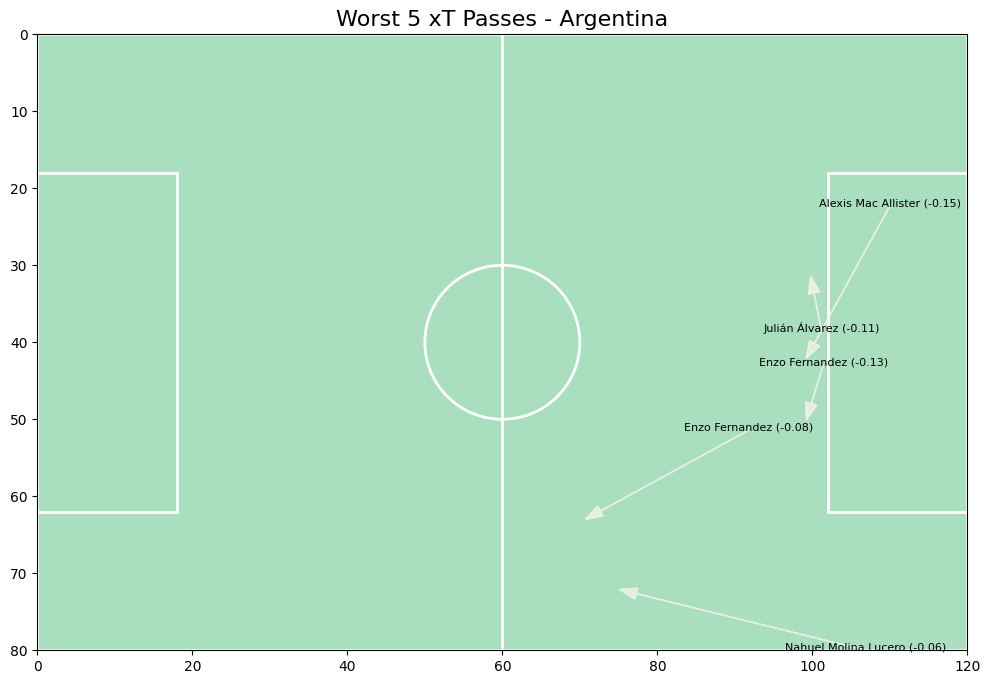

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Fonction de visualisation des passes (xT_passes)
def plot_xt_passes(df, title="xT Passes - Argentina", xt_max=0.6):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_facecolor('#A9DFBF')
    ax.set_xlim(0, terrain_longueur)
    ax.set_ylim(0, terrain_largeur)

    # Tracer les lignes du terrain
    ax.plot([0, 0], [0, terrain_largeur], 'white', lw=2)
    ax.plot([terrain_longueur, terrain_longueur], [0, terrain_largeur], 'white', lw=2)
    ax.plot([0, terrain_longueur], [0, 0], 'white', lw=2)
    ax.plot([0, terrain_longueur], [terrain_largeur, terrain_largeur], 'white', lw=2)

    # Surfaces de réparation et rond central
    surface_largeur = 44
    surface_profondeur = 18
    ax.add_patch(Rectangle((0, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
    ax.add_patch(Rectangle((terrain_longueur - surface_profondeur, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
    ax.add_patch(plt.Circle((terrain_longueur / 2, terrain_largeur / 2), 10, color='white', fill=False, lw=2))
    ax.plot([terrain_longueur / 2, terrain_longueur / 2], [0, terrain_largeur], 'white', lw=2)

    # Tracer les passes
    for _, row in df.iterrows():
        start_x, start_y = row['start_location']
        end_x, end_y = row['end_location']

        # Normaliser la couleur selon le score xT limité à xt_max
        color_intensity = min(row['xT_passes'] / xt_max, 1.0)  # Limite la couleur entre 0 et 1
        color = plt.cm.Reds(color_intensity)

        # Tracer la flèche de la passe
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, color=color, alpha=0.7, head_width=1.5, length_includes_head=True)

        # Ajouter le nom du joueur et le score xT au point de départ
        ax.text(start_x, start_y, f"{row['player.name']} ({row['xT_passes']:.2f})", color='black', fontsize=8, ha='center')

    # Ajouter le titre et inverser l'axe Y
    ax.set_title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()

# Visualiser les 5 meilleures passes de l'Argentine
plot_xt_passes(top_passes_argentina_C, title="Top 5 xT Passes - Argentina", xt_max=0.6)

# Visualiser les 5 pires passes de l'Argentine
plot_xt_passes(lowest_5_passes_argentina_C, title="Worst 5 xT Passes - Argentina", xt_max=0.6)


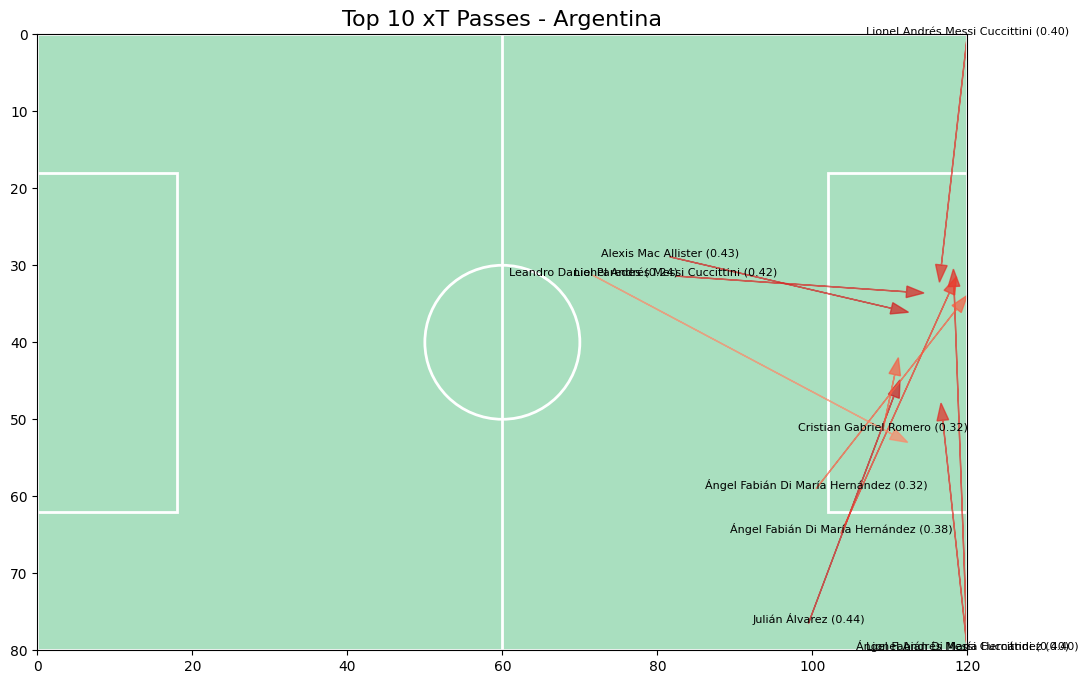

In [20]:
# Visualiser les 10 meilleures passes de l'Argentine par score xT
plot_xt_passes(top_passes_argentina_C, title="Top 10 xT Passes - Argentina", xt_max=0.6)


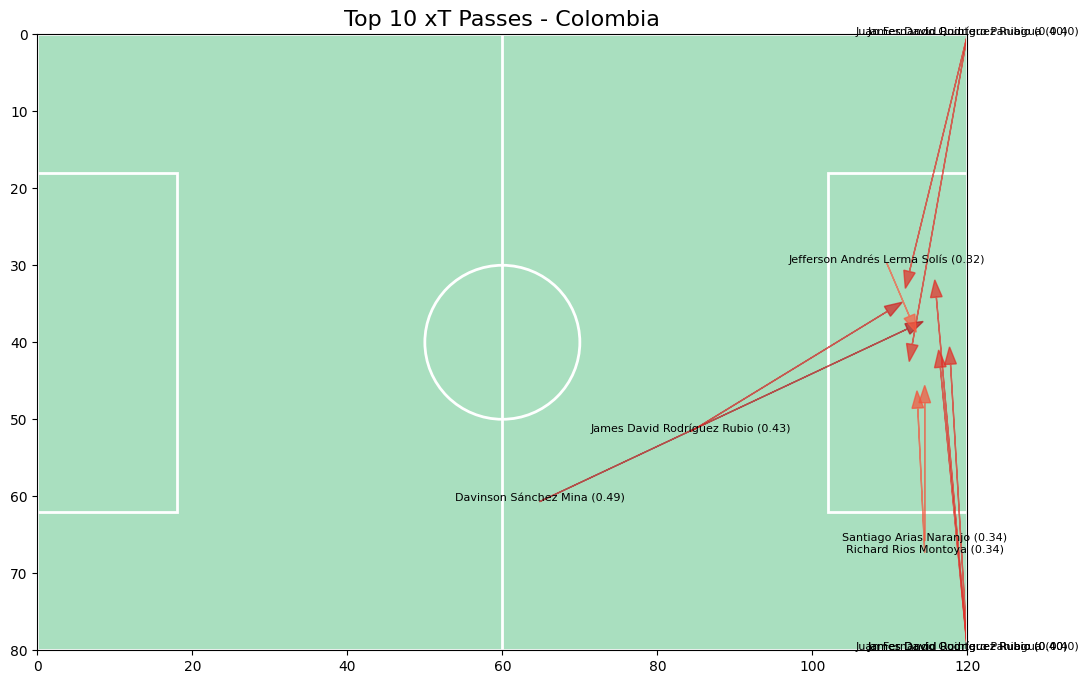

In [22]:
# Visualiser les 10 meilleures passes de la Colombie par score xT
plot_xt_passes(top_passes_colombia_C, title="Top 10 xT Passes - Colombia", xt_max=0.6)


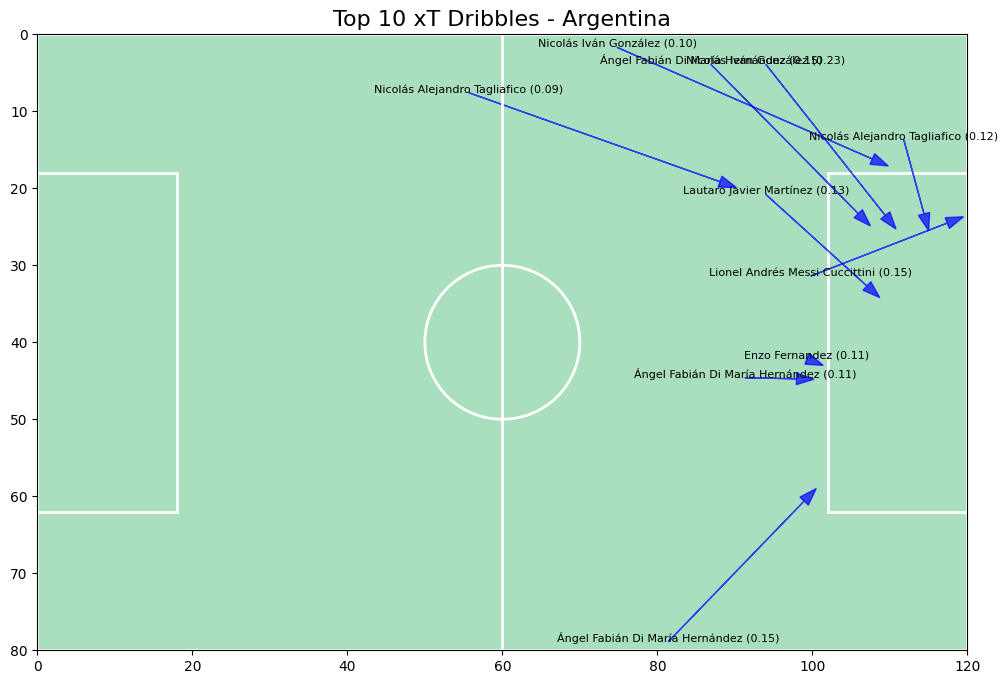

In [23]:
# Fonction de visualisation des dribbles (xT_dribbles)
def plot_xt_dribbles(df, title="Top xT Dribbles"):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_facecolor('#A9DFBF')
    ax.set_xlim(0, terrain_longueur)
    ax.set_ylim(0, terrain_largeur)

    # Tracer les lignes du terrain
    ax.plot([0, 0], [0, terrain_largeur], 'white', lw=2)
    ax.plot([terrain_longueur, terrain_longueur], [0, terrain_largeur], 'white', lw=2)
    ax.plot([0, terrain_longueur], [0, 0], 'white', lw=2)
    ax.plot([0, terrain_longueur], [terrain_largeur, terrain_largeur], 'white', lw=2)

    # Surfaces de réparation et rond central
    surface_largeur = 44
    surface_profondeur = 18
    ax.add_patch(Rectangle((0, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
    ax.add_patch(Rectangle((terrain_longueur - surface_profondeur, (terrain_largeur - surface_largeur) / 2), surface_profondeur, surface_largeur, edgecolor='white', facecolor='none', lw=2))
    ax.add_patch(plt.Circle((terrain_longueur / 2, terrain_largeur / 2), 10, color='white', fill=False, lw=2))
    ax.plot([terrain_longueur / 2, terrain_longueur / 2], [0, terrain_largeur], 'white', lw=2)

    # Tracer les dribbles
    for _, row in df.iterrows():
        start_x, start_y = row['start_location']
        end_x, end_y = row['end_location']

        # Tracer la flèche du dribble
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, color='blue', alpha=0.7, head_width=1.5, length_includes_head=True)

        # Ajouter le nom du joueur et le score xT au point de départ
        ax.text(start_x, start_y, f"{row['player.name']} ({row['xT_dribbles']:.2f})", color='black', fontsize=8, ha='center')

    # Ajouter le titre et inverser l'axe Y
    ax.set_title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()

# Visualiser les 10 meilleurs dribbles pour l'Argentine
plot_xt_dribbles(top_dribbles_argentina, title="Top 10 xT Dribbles - Argentina")


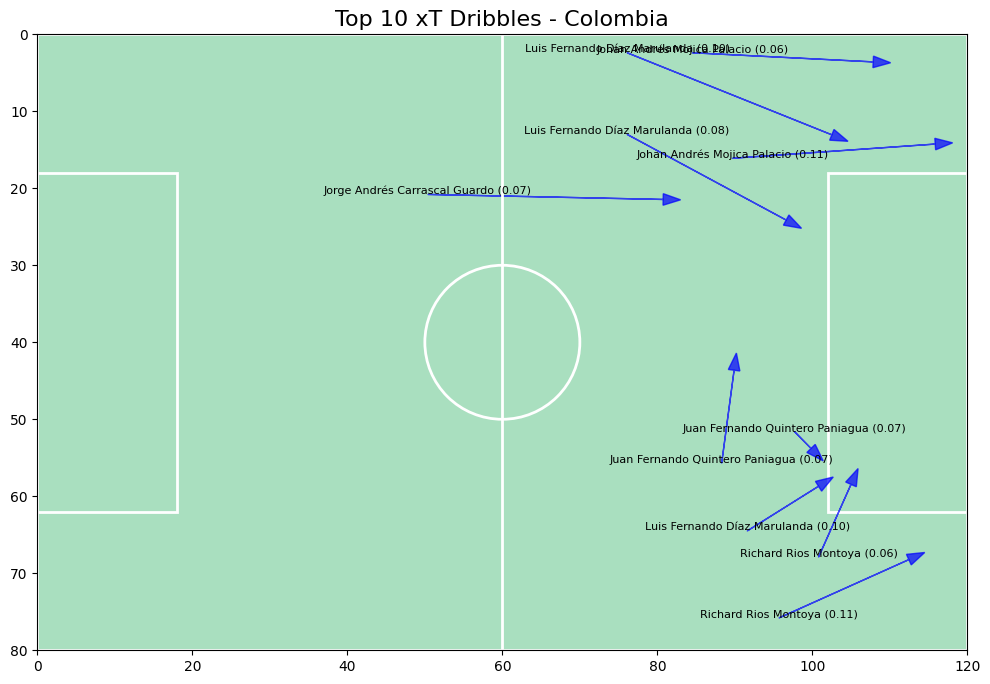

In [24]:
# Visualiser les 10 meilleurs dribbles pour la Colombie
plot_xt_dribbles(top_dribbles_colombia, title="Top 10 xT Dribbles - Colombia")


In [25]:
# Fonction pour calculer le score cumulé xT des passes pour chaque joueur
def calculate_cumulative_xt_passes(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    cumulative_xt_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT de la passe)
                xT_pass = xT_end - xT_start

                # Ajouter le résultat
                cumulative_xt_values.append((row['player.name'], xT_pass))

    # Calculer la somme totale de xT pour chaque joueur
    cumulative_xt_passes = pd.DataFrame(cumulative_xt_values, columns=['player.name', 'xT_passes']).groupby('player.name')['xT_passes'].sum().reset_index()
    return cumulative_xt_passes

# Calcul des scores cumulés xT des passes pour l'Argentine et la Colombie
cumulative_xt_passes_argentina = calculate_cumulative_xt_passes(argentina_df, xT_Grid_C)
cumulative_xt_passes_colombia = calculate_cumulative_xt_passes(colombia_df, xT_Grid_C)

# Affichage des résultats
print("Score cumulé xT passes - Argentine :")
print(cumulative_xt_passes_argentina)

print("\nScore cumulé xT passes - Colombie :")
print(cumulative_xt_passes_colombia)


Score cumulé xT passes - Argentine :
                        player.name  xT_passes
0               Alexis Mac Allister   0.652471
1           Cristian Gabriel Romero   0.692372
2          Damián Emiliano Martínez   1.789016
3                    Enzo Fernandez   0.288498
4                  Giovani Lo Celso   0.094182
5             Gonzalo Ariel Montiel   0.385542
6                    Julián Álvarez   0.446562
7           Lautaro Javier Martínez   0.234584
8            Leandro Daniel Paredes   0.444053
9    Lionel Andrés Messi Cuccittini   1.903378
10                Lisandro Martínez   0.118155
11             Nahuel Molina Lucero   0.386797
12     Nicolás Alejandro Tagliafico   1.043361
13            Nicolás Iván González   0.910700
14           Rodrigo Javier De Paul   0.875909
15  Ángel Fabián Di María Hernández   2.253875

Score cumulé xT passes - Colombie :
                        player.name  xT_passes
0         Andrés Mateus Uribe Villa   0.274201
1          Camilo Andrés Vargas G

In [26]:
# Fonction pour calculer le score cumulé xT des passes pour chaque joueur avec poste
def calculate_cumulative_xt_passes_with_positions(df, xT_grid, postes_par_joueur):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    cumulative_xt_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT de la passe)
                xT_pass = xT_end - xT_start

                # Récupérer le poste du joueur
                player_name = row['player.name']
                player_position = postes_par_joueur.get(player_name, 'Unknown')

                # Ajouter le résultat
                cumulative_xt_values.append((player_name, player_position, xT_pass))

    # Calculer la somme totale de xT pour chaque joueur
    cumulative_xt_passes = pd.DataFrame(cumulative_xt_values, columns=['player.name', 'player.position', 'xT_passes']) \
        .groupby(['player.name', 'player.position'])['xT_passes'].sum().reset_index()
    return cumulative_xt_passes

# Calcul des scores cumulés xT des passes pour l'Argentine et la Colombie
cumulative_xt_passes_argentina = calculate_cumulative_xt_passes_with_positions(argentina_df, xT_Grid_C, postes_par_joueur)
cumulative_xt_passes_colombia = calculate_cumulative_xt_passes_with_positions(colombia_df, xT_Grid_C, postes_par_joueur)

# Affichage des résultats
print("Score cumulé xT passes - Argentine :")
print(cumulative_xt_passes_argentina)

print("\nScore cumulé xT passes - Colombie :")
print(cumulative_xt_passes_colombia)


Score cumulé xT passes - Argentine :
                        player.name            player.position  xT_passes
0               Alexis Mac Allister       Left Center Midfield   0.652471
1           Cristian Gabriel Romero          Right Center Back   0.692372
2          Damián Emiliano Martínez                 Goalkeeper   1.789016
3                    Enzo Fernandez  Center Defensive Midfield   0.288498
4                  Giovani Lo Celso    Left Defensive Midfield   0.094182
5             Gonzalo Ariel Montiel                 Right Back   0.385542
6                    Julián Álvarez             Center Forward   0.446562
7           Lautaro Javier Martínez             Center Forward   0.234584
8            Leandro Daniel Paredes   Right Defensive Midfield   0.444053
9    Lionel Andrés Messi Cuccittini       Right Center Forward   1.903378
10                Lisandro Martínez           Left Center Back   0.118155
11             Nahuel Molina Lucero            Right Wing Back   0.386797
1

In [27]:
# Fonction pour calculer le score cumulé xT des dribbles pour chaque joueur avec poste
def calculate_cumulative_xt_dribbles_with_positions(df, xT_grid, postes_par_joueur):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    cumulative_xt_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Carry':  # Vérifier que l'action est un dribble
            start_loc = row['location']
            end_loc = row['carry.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT du dribble)
                xT_dribble = xT_end - xT_start

                # Récupérer le poste du joueur
                player_name = row['player.name']
                player_position = postes_par_joueur.get(player_name, 'Unknown')

                # Ajouter le résultat
                cumulative_xt_values.append((player_name, player_position, xT_dribble))

    # Calculer la somme totale de xT pour chaque joueur
    cumulative_xt_dribbles = pd.DataFrame(cumulative_xt_values, columns=['player.name', 'player.position', 'xT_dribbles']) \
        .groupby(['player.name', 'player.position'])['xT_dribbles'].sum().reset_index()
    return cumulative_xt_dribbles

# Calcul des scores cumulés xT des dribbles pour l'Argentine et la Colombie
cumulative_xt_dribbles_argentina = calculate_cumulative_xt_dribbles_with_positions(argentina_df, xT_Grid_C, postes_par_joueur)
cumulative_xt_dribbles_colombia = calculate_cumulative_xt_dribbles_with_positions(colombia_df, xT_Grid_C, postes_par_joueur)

# Affichage des résultats
print("Score cumulé xT dribbles - Argentine :")
print(cumulative_xt_dribbles_argentina)

print("\nScore cumulé xT dribbles - Colombie :")
print(cumulative_xt_dribbles_colombia)


Score cumulé xT dribbles - Argentine :
                        player.name            player.position  xT_dribbles
0               Alexis Mac Allister       Left Center Midfield     0.234041
1           Cristian Gabriel Romero          Right Center Back     0.132205
2          Damián Emiliano Martínez                 Goalkeeper     0.009698
3                    Enzo Fernandez  Center Defensive Midfield     0.207245
4                  Giovani Lo Celso    Left Defensive Midfield     0.110528
5             Gonzalo Ariel Montiel                 Right Back     0.234708
6                    Julián Álvarez             Center Forward     0.023835
7           Lautaro Javier Martínez             Center Forward     0.224404
8            Leandro Daniel Paredes   Right Defensive Midfield     0.021131
9    Lionel Andrés Messi Cuccittini       Right Center Forward     0.335620
10                Lisandro Martínez           Left Center Back     0.083476
11             Nahuel Molina Lucero            Ri

In [28]:
# Fonction pour obtenir les 10 meilleures passes d'une équipe
def get_top_10_passes(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_pass_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Pass':  # Vérifier que l'action est une passe
            start_loc = row['location']
            end_loc = row['pass.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT de la passe)
                xT_pass = xT_end - xT_start

                # Ajouter le résultat
                xT_pass_values.append((row['player.name'], xT_pass, start_loc, end_loc))

    # Convertir les résultats en DataFrame et récupérer les 10 meilleures passes
    top_10_passes = pd.DataFrame(xT_pass_values, columns=['player.name', 'xT_passes', 'start_location', 'end_location']) \
        .nlargest(10, 'xT_passes')
    return top_10_passes

# Calcul des 10 meilleures passes pour l'Argentine et la Colombie
top_10_passes_argentina = get_top_10_passes(argentina_df, xT_Grid_C)
top_10_passes_colombia = get_top_10_passes(colombia_df, xT_Grid_C)

# Affichage des résultats
print("Top 10 des passes - Argentine :")
print(top_10_passes_argentina)

print("\nTop 10 des passes - Colombie :")
print(top_10_passes_colombia)


Top 10 des passes - Argentine :
                         player.name  xT_passes start_location   end_location
258                   Julián Álvarez   0.444829   [99.5, 76.5]  [111.3, 44.9]
43               Alexis Mac Allister   0.432841   [81.6, 28.9]  [112.4, 36.1]
85    Lionel Andrés Messi Cuccittini   0.423094   [82.4, 31.4]  [114.4, 33.6]
17    Lionel Andrés Messi Cuccittini   0.404596   [120.0, 0.1]  [116.4, 32.2]
327   Lionel Andrés Messi Cuccittini   0.404596  [120.0, 80.0]  [116.6, 47.9]
401  Ángel Fabián Di María Hernández   0.404596  [120.0, 80.0]  [118.2, 30.5]
479  Ángel Fabián Di María Hernández   0.378644  [103.7, 64.8]  [118.6, 31.5]
434          Cristian Gabriel Romero   0.318915  [109.1, 51.4]  [111.1, 42.0]
514  Ángel Fabián Di María Hernández   0.318915  [100.5, 59.0]  [120.0, 33.9]
470           Leandro Daniel Paredes   0.241480   [71.7, 31.3]  [112.3, 53.0]

Top 10 des passes - Colombie :
                         player.name  xT_passes start_location   end_location


In [30]:
# Fonction pour obtenir les 10 meilleurs dribbles d'une équipe
def get_top_10_dribbles(df, xT_grid):
    x_bins, y_bins = xT_grid.shape[1], xT_grid.shape[0]
    xT_dribble_values = []

    for i, row in df.iterrows():
        if row['type.name'] == 'Carry':  # Vérifier que l'action est un dribble
            start_loc = row['location']
            end_loc = row['carry.end_location']

            if isinstance(start_loc, list) and isinstance(end_loc, list):  # Vérifier les positions
                # Calcul des scores xT pour la position de départ et d'arrivée
                xT_start = get_xt_value(start_loc, xT_grid, x_bins, y_bins)
                xT_end = get_xt_value(end_loc, xT_grid, x_bins, y_bins)

                # Calcul de la différence (score xT du dribble)
                xT_dribble = xT_end - xT_start

                # Ajouter le résultat
                xT_dribble_values.append((row['player.name'], xT_dribble, start_loc, end_loc))

    # Convertir les résultats en DataFrame et récupérer les 10 meilleurs dribbles
    top_10_dribbles = pd.DataFrame(xT_dribble_values, columns=['player.name', 'xT_dribbles', 'start_location', 'end_location']) \
        .nlargest(10, 'xT_dribbles')
    return top_10_dribbles

# Calcul des 10 meilleurs dribbles pour l'Argentine et la Colombie
top_10_dribbles_argentina = get_top_10_dribbles(argentina_df, xT_Grid_C)
top_10_dribbles_colombia = get_top_10_dribbles(colombia_df, xT_Grid_C)

# Affichage des résultats
print("Top 10 des dribbles - Argentine :")
print(top_10_dribbles_argentina)

print("\nTop 10 des dribbles - Colombie :")
print(top_10_dribbles_colombia)


Top 10 des dribbles - Argentine :
                         player.name  xT_dribbles start_location  \
296            Nicolás Iván González     0.228910    [94.0, 3.9]   
157   Lionel Andrés Messi Cuccittini     0.151438   [99.8, 31.4]   
260  Ángel Fabián Di María Hernández     0.146124    [86.9, 3.9]   
400  Ángel Fabián Di María Hernández     0.146124   [81.4, 78.9]   
410          Lautaro Javier Martínez     0.126519   [94.0, 20.8]   
12      Nicolás Alejandro Tagliafico     0.122381  [111.8, 13.7]   
252                   Enzo Fernandez     0.105457   [99.2, 42.1]   
381  Ángel Fabián Di María Hernández     0.105457   [91.3, 44.6]   
269            Nicolás Iván González     0.103544    [74.8, 1.7]   
204     Nicolás Alejandro Tagliafico     0.090269    [55.7, 7.6]   

      end_location  
296  [110.8, 25.3]  
157  [119.5, 23.7]  
260  [107.5, 24.9]  
400  [100.5, 59.0]  
410  [108.7, 34.2]  
12   [115.0, 25.5]  
252  [101.4, 43.0]  
381  [100.2, 44.8]  
269  [109.8, 17.1]  
204   [

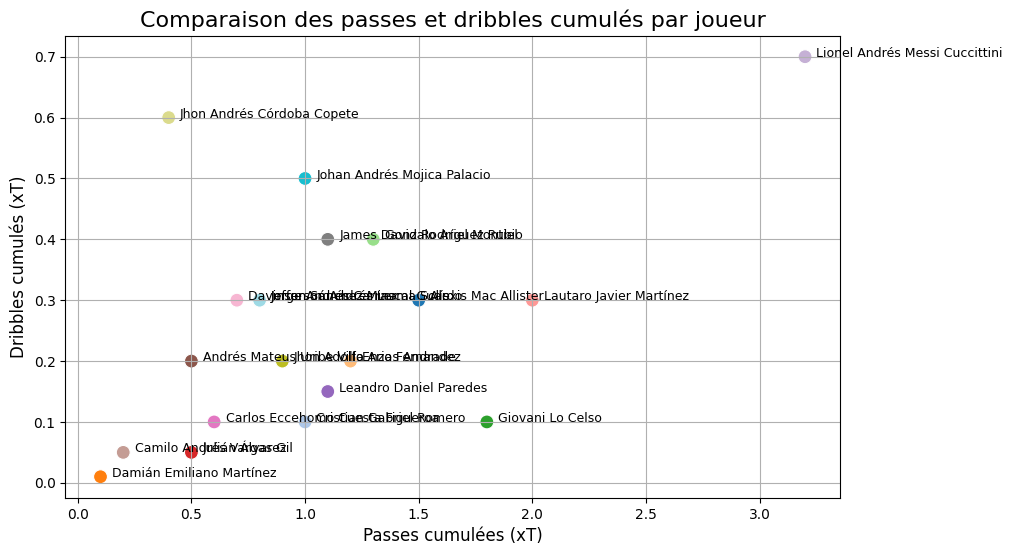

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exemple de données basées sur vos résultats pour les passes et dribbles cumulés
# Ces DataFrames devraient être calculés avec les fonctions que vous avez partagées précédemment

# Données pour l'Argentine (exemple simplifié)
argentina_data = {
    'player.name': ['Alexis Mac Allister', 'Cristian Gabriel Romero', 'Damián Emiliano Martínez', 'Enzo Fernandez', 'Giovani Lo Celso',
                    'Gonzalo Ariel Montiel', 'Julián Álvarez', 'Lautaro Javier Martínez', 'Leandro Daniel Paredes', 'Lionel Andrés Messi Cuccittini'],
    'xT_passes': [1.5, 1.0, 0.1, 1.2, 1.8, 1.3, 0.5, 2.0, 1.1, 3.2],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.3, 0.1, 0.01, 0.2, 0.1, 0.4, 0.05, 0.3, 0.15, 0.7]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Données pour la Colombie (exemple simplifié)
colombia_data = {
    'player.name': ['Andrés Mateus Uribe Villa', 'Camilo Andrés Vargas Gil', 'Carlos Eccehomo Cuesta Figueroa', 'Davinson Sánchez Mina',
                    'James David Rodríguez Rubio', 'Jefferson Andrés Lerma Solís', 'Jhon Adolfo Arias Andrade', 'Jhon Andrés Córdoba Copete',
                    'Johan Andrés Mojica Palacio', 'Jorge Andrés Carrascal Guardo'],
    'xT_passes': [0.5, 0.2, 0.6, 0.7, 1.1, 0.8, 0.9, 0.4, 1.0, 0.8],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.2, 0.05, 0.1, 0.3, 0.4, 0.3, 0.2, 0.6, 0.5, 0.3]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Convertir en DataFrames
argentina_df = pd.DataFrame(argentina_data)
colombia_df = pd.DataFrame(colombia_data)

# Fusionner les données de l'Argentine et de la Colombie pour avoir un seul DataFrame
df = pd.concat([argentina_df, colombia_df], ignore_index=True)

# Créer le graphique scatter
plt.figure(figsize=(10, 6))

# Tracer les points avec couleur en fonction de l'équipe
sns.scatterplot(x='xT_passes', y='xT_dribbles', data=df, hue='player.name', s=100, palette='tab20', legend=False)

# Ajouter des étiquettes pour chaque joueur
for i, row in df.iterrows():
    plt.text(row['xT_passes'] + 0.05, row['xT_dribbles'], row['player.name'], fontsize=9)

# Ajouter des étiquettes et un titre
plt.title("Comparaison des passes et dribbles cumulés par joueur", fontsize=16)
plt.xlabel("Passes cumulées (xT)", fontsize=12)
plt.ylabel("Dribbles cumulés (xT)", fontsize=12)

# Afficher le graphique
plt.grid(True)
plt.show()


In [39]:
import pandas as pd

# Données pour l'Argentine (exemple simplifié)
argentina_data = {
    'player.name': ['Alexis Mac Allister', 'Cristian Gabriel Romero', 'Damián Emiliano Martínez', 'Enzo Fernandez', 'Giovani Lo Celso',
                    'Gonzalo Ariel Montiel', 'Julián Álvarez', 'Lautaro Javier Martínez', 'Leandro Daniel Paredes', 'Lionel Andrés Messi Cuccittini'],
    'xT_passes': [1.5, 1.0, 0.1, 1.2, 1.8, 1.3, 0.5, 2.0, 1.1, 3.2],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.3, 0.1, 0.01, 0.2, 0.1, 0.4, 0.05, 0.3, 0.15, 0.7]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Données pour la Colombie (exemple simplifié)
colombia_data = {
    'player.name': ['Andrés Mateus Uribe Villa', 'Camilo Andrés Vargas Gil', 'Carlos Eccehomo Cuesta Figueroa', 'Davinson Sánchez Mina',
                    'James David Rodríguez Rubio', 'Jefferson Andrés Lerma Solís', 'Jhon Adolfo Arias Andrade', 'Jhon Andrés Córdoba Copete',
                    'Johan Andrés Mojica Palacio', 'Jorge Andrés Carrascal Guardo'],
    'xT_passes': [0.5, 0.2, 0.6, 0.7, 1.1, 0.8, 0.9, 0.4, 1.0, 0.8],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.2, 0.05, 0.1, 0.3, 0.4, 0.3, 0.2, 0.6, 0.5, 0.3]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Convertir en DataFrames
argentina_df = pd.DataFrame(argentina_data)
colombia_df = pd.DataFrame(colombia_data)

# Fusionner les données de l'Argentine et de la Colombie pour avoir un seul DataFrame
df = pd.concat([argentina_df, colombia_df], ignore_index=True)

# Calcul du score global (somme des passes et dribbles cumulés)
df['xT_total'] = df['xT_passes'] + df['xT_dribbles']

# Affichage des scores globaux
print(df[['player.name', 'xT_passes', 'xT_dribbles', 'xT_total']])


                        player.name  xT_passes  xT_dribbles  xT_total
0               Alexis Mac Allister        1.5         0.30      1.80
1           Cristian Gabriel Romero        1.0         0.10      1.10
2          Damián Emiliano Martínez        0.1         0.01      0.11
3                    Enzo Fernandez        1.2         0.20      1.40
4                  Giovani Lo Celso        1.8         0.10      1.90
5             Gonzalo Ariel Montiel        1.3         0.40      1.70
6                    Julián Álvarez        0.5         0.05      0.55
7           Lautaro Javier Martínez        2.0         0.30      2.30
8            Leandro Daniel Paredes        1.1         0.15      1.25
9    Lionel Andrés Messi Cuccittini        3.2         0.70      3.90
10        Andrés Mateus Uribe Villa        0.5         0.20      0.70
11         Camilo Andrés Vargas Gil        0.2         0.05      0.25
12  Carlos Eccehomo Cuesta Figueroa        0.6         0.10      0.70
13            Davins

In [41]:
import pandas as pd

# Données pour l'Argentine (exemple simplifié)
argentina_data = {
    'player.name': ['Alexis Mac Allister', 'Cristian Gabriel Romero', 'Damián Emiliano Martínez', 'Enzo Fernandez', 'Giovani Lo Celso',
                    'Gonzalo Ariel Montiel', 'Julián Álvarez', 'Lautaro Javier Martínez', 'Leandro Daniel Paredes', 'Lionel Andrés Messi Cuccittini'],
    'xT_passes': [1.5, 1.0, 0.1, 1.2, 1.8, 1.3, 0.5, 2.0, 1.1, 3.2],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.3, 0.1, 0.01, 0.2, 0.1, 0.4, 0.05, 0.3, 0.15, 0.7]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Données pour la Colombie (exemple simplifié)
colombia_data = {
    'player.name': ['Andrés Mateus Uribe Villa', 'Camilo Andrés Vargas Gil', 'Carlos Eccehomo Cuesta Figueroa', 'Davinson Sánchez Mina',
                    'James David Rodríguez Rubio', 'Jefferson Andrés Lerma Solís', 'Jhon Adolfo Arias Andrade', 'Jhon Andrés Córdoba Copete',
                    'Johan Andrés Mojica Palacio', 'Jorge Andrés Carrascal Guardo'],
    'xT_passes': [0.5, 0.2, 0.6, 0.7, 1.1, 0.8, 0.9, 0.4, 1.0, 0.8],  # Exemple de valeurs de passes cumulées (xT)
    'xT_dribbles': [0.2, 0.05, 0.1, 0.3, 0.4, 0.3, 0.2, 0.6, 0.5, 0.3]  # Exemple de valeurs de dribbles cumulés (xT)
}

# Convertir en DataFrames
argentina_df = pd.DataFrame(argentina_data)
colombia_df = pd.DataFrame(colombia_data)

# Fusionner les données de l'Argentine et de la Colombie pour avoir un seul DataFrame
df = pd.concat([argentina_df, colombia_df], ignore_index=True)

# Calcul du score global (somme des passes et dribbles cumulés)
df['xT_total'] = df['xT_passes'] + df['xT_dribbles']

# Trier les résultats par score global xT (ordre décroissant)
df_sorted = df.sort_values(by='xT_total', ascending=False)

# Affichage des scores globaux triés
print(df_sorted[['player.name', 'xT_passes', 'xT_dribbles', 'xT_total']])


                        player.name  xT_passes  xT_dribbles  xT_total
9    Lionel Andrés Messi Cuccittini        3.2         0.70      3.90
7           Lautaro Javier Martínez        2.0         0.30      2.30
4                  Giovani Lo Celso        1.8         0.10      1.90
0               Alexis Mac Allister        1.5         0.30      1.80
5             Gonzalo Ariel Montiel        1.3         0.40      1.70
14      James David Rodríguez Rubio        1.1         0.40      1.50
18      Johan Andrés Mojica Palacio        1.0         0.50      1.50
3                    Enzo Fernandez        1.2         0.20      1.40
8            Leandro Daniel Paredes        1.1         0.15      1.25
16        Jhon Adolfo Arias Andrade        0.9         0.20      1.10
15     Jefferson Andrés Lerma Solís        0.8         0.30      1.10
19    Jorge Andrés Carrascal Guardo        0.8         0.30      1.10
1           Cristian Gabriel Romero        1.0         0.10      1.10
13            Davins